

## Genome Sequence

A **genome sequence** is the complete list of nucleotides (A, C, G, and T for DNA genomes) that make up all the chromosomes of an individual or a species. It encompasses the entire genetic information encoded in an organism's DNA. While the vast majority of nucleotides are identical between individuals within a species, sequencing multiple individuals is necessary to understand genetic diversity.

## Advantages and Applications of Genomic Data

Genomic data has revolutionized various fields of biology and medicine. Here are some advantages and applications:

1. **Personalized Medicine**:
   - Genomic data allows tailoring medical treatments to an individual's genetic makeup.
   - It helps predict disease risks at an individual level, enabling preemptive actions or early interventions.
   - Pharmacogenomics uses genomic information to optimize drug selection and dosages based on genetic variations.

2. **Disease Research and Prevention**:
   - Genomic studies identify genetic variants associated with diseases.
   - Genome-wide association studies (GWAS) reveal links between specific genes and diseases.
   - Understanding disease mechanisms at the genetic level aids in prevention and treatment.

3. **Drug Development and Clinical Trials**:
   - Genomic data guides drug discovery by identifying potential drug targets.
   - Preclinical studies use genomics to assess drug safety and efficacy.
   - Clinical trials consider genetic factors to personalize treatments.

4. **Microbial Genomics**:
   - Studying microbial genomes helps understand pathogenicity, antibiotic resistance, and evolution.
   - Metagenomics explores microbial communities in environmental samples.

5. **Evolutionary Biology**:
   - Genomic data reveals evolutionary relationships among species.
   - Comparative genomics identifies conserved genes and functional elements across organisms.

6. **Biotechnology and Agriculture**:
   - Genomics improves crop breeding by identifying desirable traits.
   - Genetic modification enhances crop yield, disease resistance, and nutritional content.

7. **Forensics and Anthropology**:
   - DNA profiling uses genomic data for criminal investigations and paternity testing.
   - Ancient DNA analysis informs human evolutionary history and migration patterns.

In summary, genomic data holds immense potential for advancing health care, research, and our understanding of life itself.

---


In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk(r"C:\Users\anush\Desktop\20MIP10001\Genome Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\anush\Desktop\20MIP10001\Genome Dataset\600 notable genotypes SNPedia.csv.xlsx
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\Child 1 Genome.csv
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\Child 2 Genome.csv
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\Child 3 Genome.csv
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\Father Genome.csv
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\genome_file_description.csv
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\genome_zeeshan_usmani.csv
C:\Users\anush\Desktop\20MIP10001\Genome Dataset\Mother Genome.csv


In [44]:
!pip install openpyxl 
!pip install pandas-profiling

In [45]:
import pandas as pd

# Importing data using double backslashes
genome = pd.read_csv("C:\\Users\\anush\\Desktop\\20MIP10001\\Genome Dataset\\genome_zeeshan_usmani.csv")
ref = pd.read_excel("C:\\Users\\anush\\Desktop\\20MIP10001\\Genome Dataset\\600 notable genotypes SNPedia.csv.xlsx")


In [46]:
ref.describe #data exploration

<bound method NDFrame.describe of           Unnamed: 0  Magnitude Repute  \
0         Rs661(A;A)        9.0    Bad   
1        Rs6647(T;T)        0.0   Good   
2        Rs6647(C;C)        0.0   Good   
3        Rs1303(T;T)        0.0   Good   
4    Rs28929471(G;G)        0.0   Good   
..               ...        ...    ...   
595   Rs2073711(C;C)        2.0    Bad   
596   Rs4988321(G;G)        0.0   Good   
597  Rs28939709(G;G)        0.0   Good   
598  Rs28937588(G;G)        0.0   Good   
599  Rs28939710(G;G)        0.0   Good   

                                               Summary  
0                      early onset Alzheimer's disease  
1                  Normal; two copies of Pi-M1V allele  
2                  Normal; two copies of Pi-M1A allele  
3                                    common in clinvar  
4                          common in complete genomics  
..                                                 ...  
595  Back Pain: normal (higher) risk of Lumbar Disc...  
596  

In [47]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  600 non-null    object 
 1   Magnitude   600 non-null    float64
 2   Repute      557 non-null    object 
 3   Summary     570 non-null    object 
dtypes: float64(1), object(3)
memory usage: 18.9+ KB


In [48]:
pd.isnull(ref).sum()

Unnamed: 0     0
Magnitude      0
Repute        43
Summary       30
dtype: int64

In [49]:
#cleaning the genotypes with no information
reference_df = ref[ref['Summary'].notna()]
reference_df.describe

<bound method NDFrame.describe of           Unnamed: 0  Magnitude Repute  \
0         Rs661(A;A)        9.0    Bad   
1        Rs6647(T;T)        0.0   Good   
2        Rs6647(C;C)        0.0   Good   
3        Rs1303(T;T)        0.0   Good   
4    Rs28929471(G;G)        0.0   Good   
..               ...        ...    ...   
595   Rs2073711(C;C)        2.0    Bad   
596   Rs4988321(G;G)        0.0   Good   
597  Rs28939709(G;G)        0.0   Good   
598  Rs28937588(G;G)        0.0   Good   
599  Rs28939710(G;G)        0.0   Good   

                                               Summary  
0                      early onset Alzheimer's disease  
1                  Normal; two copies of Pi-M1V allele  
2                  Normal; two copies of Pi-M1A allele  
3                                    common in clinvar  
4                          common in complete genomics  
..                                                 ...  
595  Back Pain: normal (higher) risk of Lumbar Disc...  
596  

In [50]:
reference_df.head()

,Unnamed: 0,Magnitude,Repute,Summary
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele
3,Rs1303(T;T),0.0,Good,common in clinvar
4,Rs28929471(G;G),0.0,Good,common in complete genomics


In [51]:
#renaming 1st column as 'rsid'
reference_df.rename(columns={'Unnamed: 0':'rsid'}, inplace=True)
reference_df.head()

,rsid,Magnitude,Repute,Summary
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele
3,Rs1303(T;T),0.0,Good,common in clinvar
4,Rs28929471(G;G),0.0,Good,common in complete genomics


In [52]:
reference_df["genotype"] = reference_df["rsid"].str.extract('.*\((.*)\).*') #to make new column "genotype"
reference_df["genotype"] = reference_df["genotype"].str.replace(";","") #exclude ; from values of 'genotype'
reference_df["rsid"] = reference_df['rsid'].str.replace("\((.*)\)","") #removing extra values from column 'rsid'

reference_df["rsid"] = reference_df["rsid"].str.lower()
reference_df.head()

,rsid,Magnitude,Repute,Summary,genotype
0,rs661(a;a),9.0,Bad,early onset Alzheimer's disease,AA
1,rs6647(t;t),0.0,Good,Normal; two copies of Pi-M1V allele,TT
2,rs6647(c;c),0.0,Good,Normal; two copies of Pi-M1A allele,CC
3,rs1303(t;t),0.0,Good,common in clinvar,TT
4,rs28929471(g;g),0.0,Good,common in complete genomics,GG


In [53]:
genome.head()

,# rsid,chromosome,position,genotype
0,rs12564807,1,734462,AA
1,rs3131972,1,752721,AG
2,rs148828841,1,760998,AC
3,rs12124819,1,776546,AA
4,rs115093905,1,787173,GG


In [54]:
#filtering those snips of genome which have some info in reference dataframe and saving them in another dataframe
genome.rename(columns={'# rsid':'rsid'}, inplace=True)
snps_with_info=pd.merge(reference_df,genome, on="rsid", how="left")
snps_with_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rsid        570 non-null    object 
 1   Magnitude   570 non-null    float64
 2   Repute      555 non-null    object 
 3   Summary     570 non-null    object 
 4   genotype_x  570 non-null    object 
 5   chromosome  0 non-null      object 
 6   position    0 non-null      float64
 7   genotype_y  0 non-null      object 
dtypes: float64(2), object(6)
memory usage: 35.8+ KB


In [55]:
snps_with_info=snps_with_info.drop_duplicates()
snps_with_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 569
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rsid        475 non-null    object 
 1   Magnitude   475 non-null    float64
 2   Repute      465 non-null    object 
 3   Summary     475 non-null    object 
 4   genotype_x  475 non-null    object 
 5   chromosome  0 non-null      object 
 6   position    0 non-null      float64
 7   genotype_y  0 non-null      object 
dtypes: float64(2), object(6)
memory usage: 33.4+ KB


In [56]:
snps_with_info.drop(["genotype_y","position"],inplace=True,axis=1)#dropping unnecessary columns
snps_with_info.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
565    False
566    False
567    False
568    False
569    False
Length: 475, dtype: bool

In [57]:
#generating profile report 
'''$value[1].jpgfrom pandas_profiling import ProfileReport
report = ProfileReport(genome)
report
'''

'$value[1].jpgfrom pandas_profiling import ProfileReport\nreport = ProfileReport(genome)\nreport\n'

In [58]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python >=3.7, <3.12; 4.6.4 Requires-Python >=3.7, <3.12; 4.6.5 Requires-Python >=3.7, <3.12
ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)
ERROR: No matching distribution found for ydata-profiling


In [59]:
# generating profile report
'''
from ydata_profiling import ProfileReport
report =ProfileReport(genome)
report
'''

'\nfrom ydata_profiling import ProfileReport\nreport =ProfileReport(genome)\nreport\n'

In [60]:
#Checking no. of chromosomes and SNPs for each chromosome
chromosome_num = genome.groupby("chromosome")["chromosome"].count()
chromosome_num

chromosome
1     47742
2     46815
3     39186
4     34386
5     34900
6     40965
7     33552
8     30651
9     27010
10    29592
11    29883
12    29068
13    21882
14    19002
15    18660
16    19680
17    19364
18     1950
18    14696
19    13948
20    14730
21     8571
22     9307
MT     3287
X     19588
Y      2129
Name: chromosome, dtype: int64

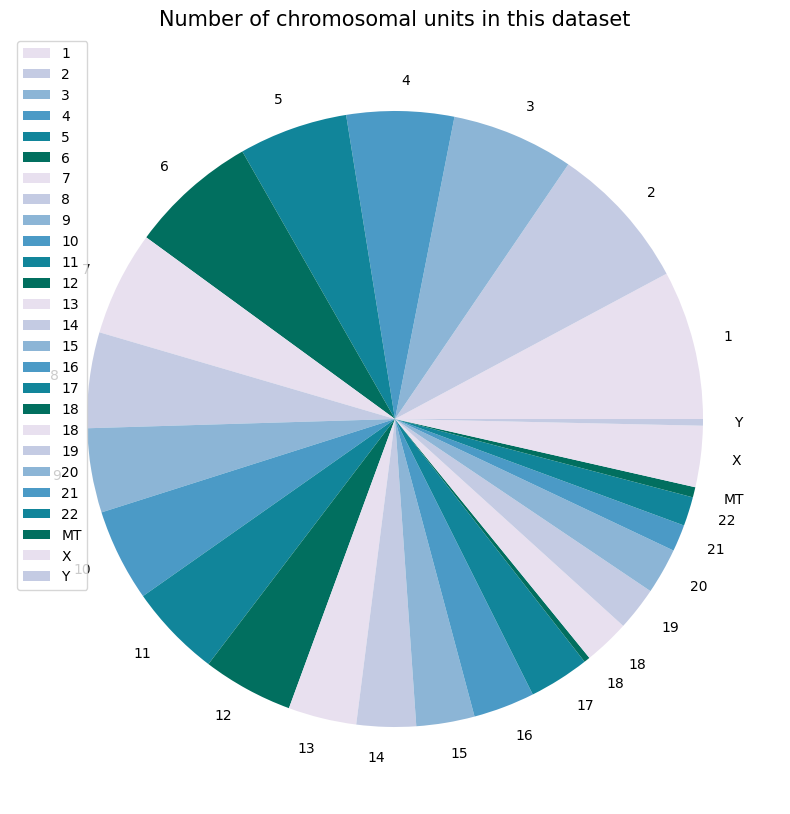

In [61]:
fig=plt.figure(figsize=(10,10))
colors = sns.color_palette('PuBuGn')

plt.pie(chromosome_num.values, labels = chromosome_num.index, colors=colors)
plt.title("Number of chromosomal units in this dataset", fontsize=15)
plt.legend()
plt.show()

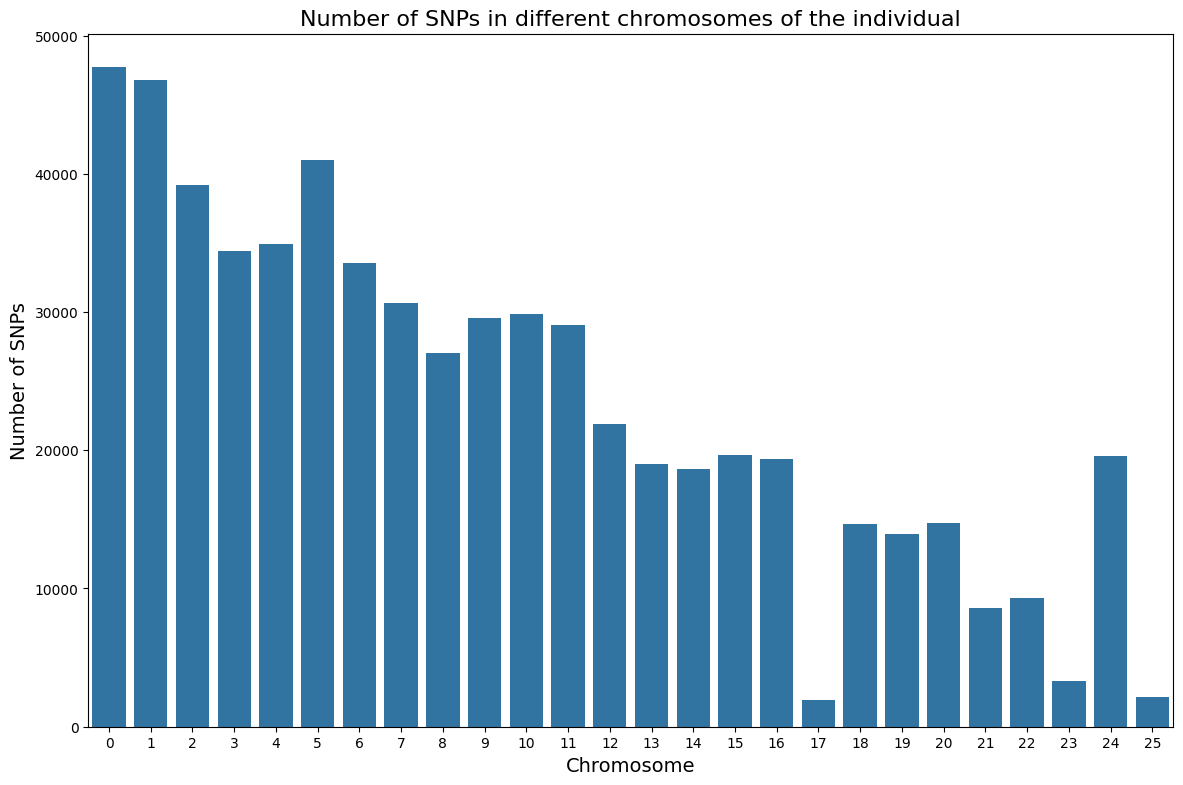

In [62]:
plt.figure(figsize=(14,9))
sns.barplot(chromosome_num.values)
plt.title("Number of SNPs in different chromosomes of the individual", fontsize=16)
plt.xlabel("Chromosome", fontsize=14)
plt.ylabel("Number of SNPs", fontsize=14)
plt.show()

In [63]:
#Checking no. of different phenotypes
snps_with_info.rename(columns={"genotype_x":"genotype"},inplace=True)
snps_with_info.head()

,rsid,Magnitude,Repute,Summary,genotype,chromosome
0,rs661(a;a),9.0,Bad,early onset Alzheimer's disease,AA,NaN
1,rs6647(t;t),0.0,Good,Normal; two copies of Pi-M1V allele,TT,NaN
2,rs6647(c;c),0.0,Good,Normal; two copies of Pi-M1A allele,CC,NaN
3,rs1303(t;t),0.0,Good,common in clinvar,TT,NaN
4,rs28929471(g;g),0.0,Good,common in complete genomics,GG,NaN


In [64]:
genome["genotype"].value_counts() #checking no of different genotypes

genotype
CC    112479
GG    112108
TT     88446
AA     88386
CT     66557
AG     66433
GT     15299
AC     15229
II     10634
--      7125
C       6028
G       5748
A       5365
T       4964
DD      3604
CG       787
I        661
AT       430
D        213
DI        48
Name: count, dtype: int64

In [65]:
#Some other interesting traits to be worth reading
significant_info = snps_with_info[snps_with_info["Magnitude"] >= 2.0]
significant_info

,rsid,Magnitude,Repute,Summary,genotype,chromosome
0,rs661(a;a),9.0,Bad,early onset Alzheimer's disease,AA,NaN
6,rs28929474(a;a),5.5,Bad,Alpha-1 Antitrypsin Deficiency,AA,NaN
8,rs17580(t;t),2.5,Bad,a slightly reduced functionality form of Alpha...,TT,NaN
10,rs28931568(a;a),4.0,Bad,high risk of emphysema due to Alpha 1-Antitryp...,AA,NaN
12,rs28931569(c;c),4.0,NaN,high risk of emphysema,CC,NaN
...,...,...,...,...,...,...
546,rs324420(a;a),2.5,Bad,significantly increased risk for substance use...,AA,NaN
550,rs4986790(g;g),2.5,Bad,complex; numerous associations reported,GG,NaN
552,rs4986791(t;t),2.5,NaN,complex; see details,TT,NaN
564,rs2073711(t;t),2.0,Good,Back Pain: lower risk of Lumbar Disc Disease.,TT,NaN


In [66]:
#snps showing positive aspects about this person
significant_info.loc[snps_with_info["Repute"] == "Good"]

,rsid,Magnitude,Repute,Summary,genotype,chromosome
48,rs5882(g;g),2.1,Good,"Longer lifespan, 0.28x lower risk of dementia,...",GG,NaN
268,rs1799990(g;g),2.0,Good,"Resistance to vCJD (PrP 129 Val homozygous), 1...",GG,NaN
298,rs1042522(c;c),3.0,Good,Live 3 years longer. Chemotherapy is more effe...,CC,NaN
564,rs2073711(t;t),2.0,Good,Back Pain: lower risk of Lumbar Disc Disease.,TT,NaN


In [67]:
#Diseases
significant_info[significant_info["Summary"].str.contains("cancer") ] #cancer risk

,rsid,Magnitude,Repute,Summary,genotype,chromosome
40,rs4986852(a;a),2.0,NaN,predisposition to breast cancer?,AA,NaN
42,rs1800709(t;t),2.0,NaN,predisposition to breast cancer?,TT,NaN
285,rs486907(a;a),2.0,Bad,2x increased prostate cancer risk,AA,NaN
431,rs144848(g;g),2.0,Bad,very slightly increased breast cancer risk,GG,NaN


In [68]:
#checking for suspectibility to different diseases
significant_info[significant_info["Summary"].str.contains("risk") ]

,rsid,Magnitude,Repute,Summary,genotype,chromosome
10,rs28931568(a;a),4.0,Bad,high risk of emphysema due to Alpha 1-Antitryp...,AA,NaN
12,rs28931569(c;c),4.0,NaN,high risk of emphysema,CC,NaN
31,rs1800888(t;t),2.5,Bad,increased risk of coronary artery disease,TT,NaN
33,rs4994(c;c),2.0,Bad,2x higher risk in certain women for cardiac ev...,CC,NaN
48,rs5882(g;g),2.1,Good,"Longer lifespan, 0.28x lower risk of dementia,...",GG,NaN
49,rs5882(a;a),2.0,Bad,Faster aging. Increased risk for Dementia. Les...,AA,NaN
52,rs2230199(g;g),2.0,Bad,2.5x+ risk of ARMD,GG,NaN
257,rs5918(c;c),2.5,Bad,"MI risk, aspirin resistance",CC,NaN
268,rs1799990(g;g),2.0,Good,"Resistance to vCJD (PrP 129 Val homozygous), 1...",GG,NaN
285,rs486907(a;a),2.0,Bad,2x increased prostate cancer risk,AA,NaN


In [69]:
significant_info[significant_info["Summary"].str.contains("emphysema") ] 

,rsid,Magnitude,Repute,Summary,genotype,chromosome
10,rs28931568(a;a),4.0,Bad,high risk of emphysema due to Alpha 1-Antitryp...,AA,NaN
12,rs28931569(c;c),4.0,NaN,high risk of emphysema,CC,NaN


In [70]:
significant_info[significant_info["Summary"].str.contains("dementia|Dementia") ]

,rsid,Magnitude,Repute,Summary,genotype,chromosome
48,rs5882(g;g),2.1,Good,"Longer lifespan, 0.28x lower risk of dementia,...",GG,NaN
49,rs5882(a;a),2.0,Bad,Faster aging. Increased risk for Dementia. Les...,AA,NaN


In [71]:
#Weight gain
genome[genome["rsid"] == "rs662799"]

,rsid,chromosome,position,genotype
389860,rs662799,11,116663707,AA


In [72]:
#SNPs which came exclusively from father
genome[genome["chromosome"]=="Y"]

,rsid,chromosome,position,genotype
605128,i4000095,Y,2649694,T
605129,i4000093,Y,2649696,--
605130,rs11575897,Y,2655180,G
605131,i5004371,Y,2655248,G
605132,i5004367,Y,2655265,T
...,...,...,...,...
607252,rs6568298,Y,59029728,T
607253,rs4047343,Y,59030922,G
607254,rs6568294,Y,59031514,C
607255,rs2334083,Y,59032331,C


In [73]:
#SNPs which came exclusively from mother
genome[genome["chromosome"]=="X"]

,rsid,chromosome,position,genotype
585540,rs6644972,X,178624,GG
585541,rs28475515,X,182276,TT
585542,rs28463388,X,191998,TT
585543,rs28669107,X,195014,CG
585544,i6033542,X,200928,CC
...,...,...,...,...
605123,rs1973880,X,155230350,CC
605124,i6050410,X,155231143,II
605125,i6033894,X,155232600,CC
605126,rs3093493,X,155232838,AA
